In [1]:
# Quick EDA on aggregated_stats.csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('../aggregated_stats.csv')
print(f'Shape: {df.shape}')
df.head()

C:\Users\caleb\AppData\Local\Temp\ipykernel_9936\32971798.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Shape: (310, 265)


,champion_id,champion_name,team_position,total_games_played_in_role,total_games_per_champion,avg_kills,avg_deaths,avg_deaths_by_enemy_champs,avg_assists,avg_kill_participation,...,pct_of_matches_with_vision,pct_of_matches_with_spell_vamp,pct_of_matches_with_boots,pct_of_matches_with_aura,pct_of_matches_with_magic_penetration,pct_of_matches_with_cooldown_reduction,pct_of_matches_with_armor,pct_of_matches_with_health_regen,pct_of_matches_with_mana,pct_of_matches_with_nonboots_movement
0,18,Tristana,BOTTOM,19765,22191,7.841437,5.417050,5.398583,5.418265,0.472951,...,0.669910,16.704041,0.212961,0.001410,0.002821,0.070517,0.729145,0.548621,0.001410,19.976024
1,18,Tristana,MIDDLE,2284,22191,6.709720,5.612522,5.593257,4.324431,0.414998,...,0.604686,16.099773,0.806248,0.000000,0.012598,0.176367,0.869237,0.692870,0.000000,19.286974
2,26,Zilean,UTILITY,4116,5021,1.772595,4.638241,4.614674,13.801749,0.560299,...,39.115874,0.000000,5.953710,6.839324,0.327454,41.110367,9.064523,32.693310,7.070031,22.147801
3,26,Zilean,MIDDLE,716,5021,2.766760,3.621508,3.603352,10.705307,0.480971,...,2.444545,0.000000,4.708013,0.769579,1.177003,21.004980,1.629697,3.123585,36.441829,27.885921
4,27,Singed,TOP,5326,6100,4.029103,6.057454,5.680248,7.370259,0.388191,...,0.893526,5.939005,6.425896,0.599251,3.563403,13.627608,16.982343,2.974853,1.417871,17.421081


In [2]:
# Check for missing values
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

avg_supp_quest_completion_time                         253
total_games_completed_supp_quest_first                 252
avg_jungler_kills_early_jungle                         221
avg_jungler_early_kills_on_laners                      221
pct_of_games_with_highest_crowd_control_score           44
avg_kills_on_other_lanes_early_as_jungler               40
avg_times_had_early_takedowns_in_all_lanes_as_laner     40
pct_of_games_with_highest_damage_dealt                   4
avg_individual_solo_towers_kills_late_game               1
dtype: int64

In [3]:
# Summary statistics for numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
champion_id,310.0,185.225806,244.929791,1.000000,41.250000,85.500000,166.000000,950.000000
total_games_played_in_role,310.0,4332.693548,4248.924568,119.000000,949.250000,3244.500000,6220.500000,24103.000000
total_games_per_champion,310.0,7789.316129,4244.269460,1401.000000,4657.750000,6802.000000,9482.000000,24548.000000
avg_kills,310.0,5.436452,1.791521,0.812132,4.322950,5.525270,6.722745,9.262436
avg_deaths,310.0,5.649780,0.731699,3.463319,5.164385,5.618687,6.056549,8.713043
...,...,...,...,...,...,...,...,...
pct_of_matches_with_cooldown_reduction,310.0,23.883527,17.323242,0.070517,10.423806,21.396872,34.460530,73.537397
pct_of_matches_with_armor,310.0,12.340699,14.695134,0.211193,2.481457,6.851132,14.842004,82.188841
pct_of_matches_with_health_regen,310.0,12.609252,15.161032,0.079618,0.940525,4.513059,26.847200,75.247871
pct_of_matches_with_mana,310.0,9.661627,13.747129,0.000000,0.094984,1.543989,19.038011,67.327586


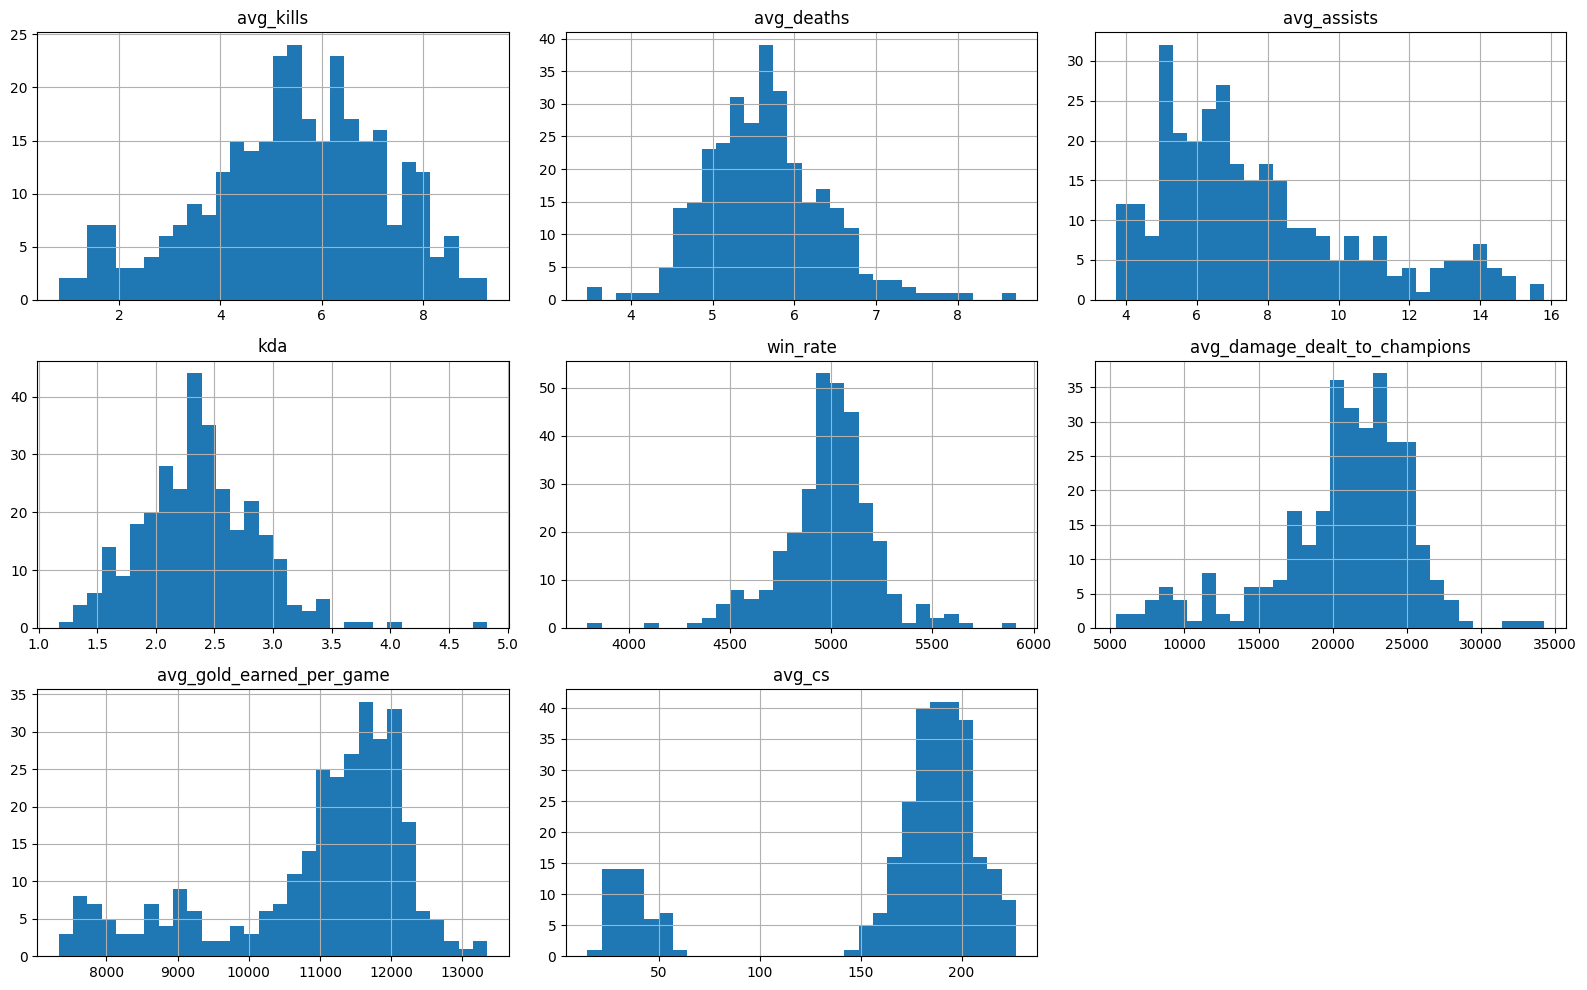

In [5]:
# Plot distributions of a few key features
features = ['avg_kills', 'avg_deaths', 'avg_assists', 'kda', 'win_rate', 'avg_damage_dealt_to_champions', 'avg_gold_earned_per_game', 'avg_cs']
df[features].hist(bins=30, figsize=(16, 10))
plt.tight_layout()
plt.show()

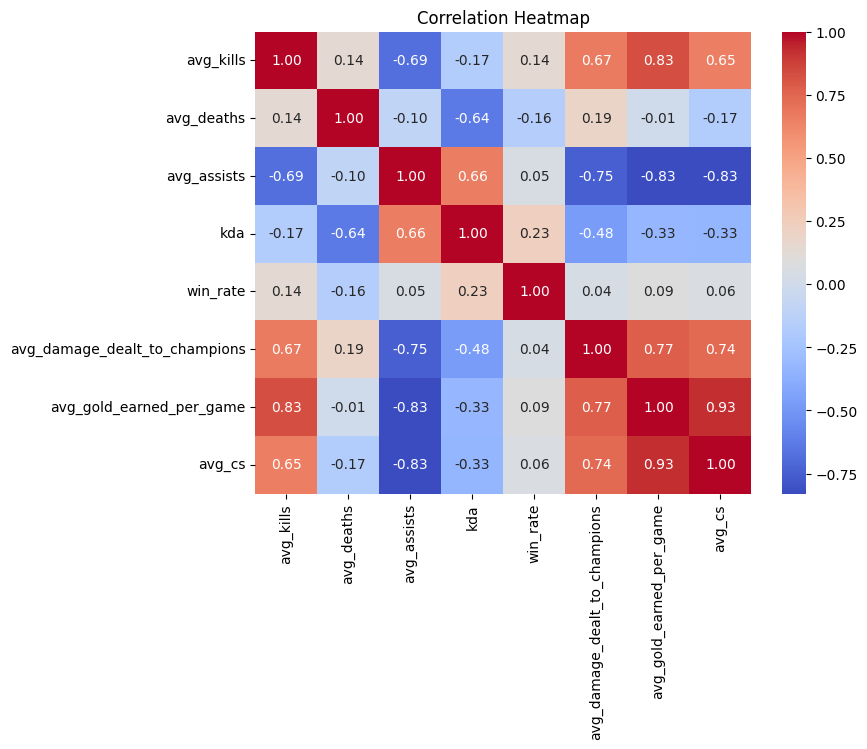

In [6]:
# Correlation heatmap for a subset of features
corr = df[features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [7]:
# List columns for feature selection
print('Columns:')
for i, col in enumerate(df.columns):
    print(f'{i}: {col}')

Columns:
0: champion_id
1: champion_name
2: team_position
3: total_games_played_in_role
4: total_games_per_champion
5: avg_kills
6: avg_deaths
7: avg_deaths_by_enemy_champs
8: avg_assists
9: avg_kill_participation
10: avg_takedowns
11: total_wins
12: pct_of_games_with_highest_damage_dealt
13: avg_pct_damage_dealt_in_team
14: average_damage_per_minute
15: avg_damage_dealt_to_champions
16: avg_total_damage_dealt
17: avg_magic_damage_dealt_to_champions
18: avg_total_magic_damage_dealt
19: avg_physical_damage_dealt_to_champions
20: avg_total_physical_damage_dealt
21: avg_true_damage_dealt_to_champions
22: avg_total_true_damage_dealt
23: avg_largest_critical_strike
24: avg_pct_damage_taken_in_team
25: avg_damage_taken
26: avg_magic_damage_taken
27: avg_physical_damage_taken
28: avg_true_damage_taken
29: avg_damage_self_mitigated
30: avg_times_killed_champ_took_full_team_damage_and_survived
31: avg_times_survived_single_digit_hp
32: avg_times_survived_three_immobilizes_in_fight
33: avg_times